# Sesión 3 A

## 1. Repaso de probabilidad (parte 2A)

### 1.1. Variables aleatorias

Las variables aleatorias son funciones que asignan un valor numérico a cada resultado de un experimento aleatorio. Se clasifican en dos tipos:

* **Variables aleatorias discretas**
* **Variables aleatorias continuas**

#### Variables aleatorias discretas

```{admonition} Definición
:class: note

Sea $\Omega$ un espacio muestral discreto, es decir, un conjunto finito o numerable de posibles resultados de un experimento aleatorio.

Una variable aleatoria discreta es una función que asigna un número real a cada elemento de $\Omega$:

$$
X: \Omega \to \mathbb{R}
$$

Es decir, toma un resultado del experimento aleatorio y lo traduce a un número real que nos interesa analizar o interpretar.
```

##### ¿por qué usamos variables aleatorias?

Cuando trabajamos con variables aleatorias, no nos enfocamos directamente en los resultados del experimento (como obtener un 3 y un 5 al lanzar dos datos), sino en _alguna cantidad derivada_ de esos resultados: una suma, una ganacia, un conteo, etc.

Esto nos permite:

- Modelar situaciones de forma numérica.
- Usar herramientas matemáticas para analizar fenómenos aleatorios.
- Calcular cantidades como la probabilidad de éxito, el valor esperado o la variabilidad de un resultado.

**Ejemplo**

Supongamos que lanzamos dos dados. El espacio mestral es:

$$
\Omega = \{(i,j): i,j=1, 2, \dots, 6\}.
$$

Este conjunto tiene 36 posibles pares ordenados, y si los dados son justos, cada uno tiene la misma probabilidad:

$$p(i, j) = \frac{1}{36}$$

Ahora, supongamos el siguiente juego:

- Ganas $500 si la suma de los datos es 7.
- Pierdes $100 en cualquier otro caso.

Podemos **definir una variable aleatoria discreta $X(i, j)$** que represente la ganacia del juego:

$$
X(i,j) = \left\lbrace
\begin{array}{lc}
500  &  \text{si } i+j=7 \\
-100 &  \text{si } i+j\neq7
\end{array}
\right .
$$

```{admonition} Interpretación
:class: tip

Esta **variable aleatoria** convierte los resultados del experimento (el lanzamiento de los dados) en una cantidad que nos interesa: la ganancia o pérdida en el juego.

Así, en lugar de analizar directamente los pares $(i, j)$, analizamos el _comportamiento_ de $X$, que ya resume lo que queremos estudiar.
```

#### 1.1.1. Función de _masa_ de probabilidad (PMF)

Una vez que tenemos una variable aleatoria discreta $X$, queremos saber con qué probabilidad toma cada uno de sus posibles valores.

Para eso usamos la función de masa de probabilidad o PMF _(Probability Mass Function)_.

##### ¿qué hace la PMF?

La PMF asigna una probabilidad a cada valor posible que puede tomar la variable aleatoria.

En otras palabras:

> La PMF mapea cada valor real que puede tomar $X$ al número entre 0 y 1 que representa su **probabilidad**.

![](../images/PMF.png)

Consideramos el tiro de un solo dado. El dado está cargado, de modo que solo salen los valores $1$, $5$ y $6$, y de modo que la función de probabilidad sea:


$$
f(X) = \left\{\begin{array}{cc }0.3 & X=1 \\ 0.3 & X=5 \\ 0.4 & X=6\end{array}\right.
$$

```{thebe-button}
```




In [ ]:
from scipy import stats
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
# definir listas de valores de X y probabilidades
xk = [1, 5, 6]
pk = [0.3, 0.3, 0.4]

In [ ]:
# se define una variable aleatoria discreta
X = stats.rv_discrete(name='X', values=(xk, pk))

In [ ]:
x = range(1,7)
y = X.pmf(x)

plt.plot(x, y, 'bo', label='PMF')
plt.vlines(x, 0, y, colors='b', lw=5, alpha=0.5)
plt.title('Función de masa de probabilidad')
plt.xlabel('Valores de X')
plt.ylabel('Probabilidad')
plt.legend()
plt.grid()
plt.show()

#### 1.1.2. Función de distribución acumulada (CDF)

La función de distribución acumulada —conocida como CDF _(Cumulative Distribution Function)_— es una forma alternativa de describir una variable aleatoria discreta $X$.

##### ¿qué hace la CDF?

La CDF asigna a cada valor $x$ la probabilidad de que la variable aleatoria $X$ tome un valor **menor o igual** a $x$.


![](../images/CMF.png)

```{admonition} Propiedades de la CDF
:class: note

- $F(x)$ es **monótona no decreciente**: nunca baja.

- $0 \leq F(x) \leq 1$.

- $\lim_{x \to \infty} F(x) = 1$.

- $\lim_{x \to -\infty} F(x) = 0$.
```

```{thebe-button}
```

Como tabla, siguiendo el ejemplo de los dados:

$$
F(X) = p(X \leq x).
$$

| x      | 1   | 2   | 3   | 4   | 5   | 6   |
| ------ | --- | --- | --- | --- | --- | --- |
| p(X=x) | 0.3 | 0   | 0   | 0   | 0.3 | 0.4 |
| F(x)   | 0.3 | 0.3 | 0.3 | 0.3 | 0.6 | 1   |

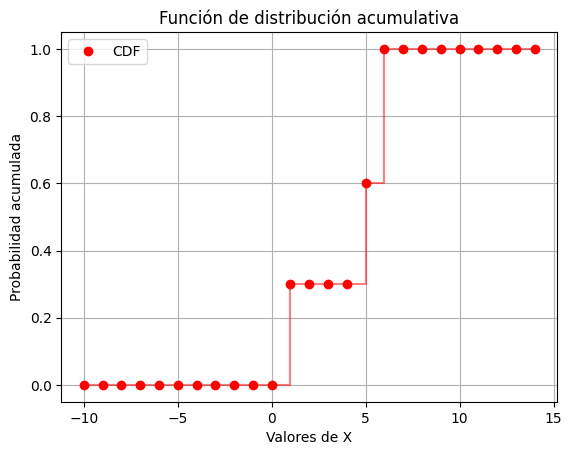

In [6]:
x = range(-10,15)
y = X.cdf(x)
plt.plot(x, y, 'ro', label='CDF')
plt.step(x, y, where='post', color='r', alpha=0.5)
plt.title('Función de distribución acumulativa')
plt.xlabel('Valores de X')
plt.ylabel('Probabilidad acumulada')
plt.legend()
plt.grid()
plt.show()

```{admonition} OJO
:class: warning

Es fácil notar que:

- $(0 \leq p(a) \leq 1)$
- $(x)$ puede ser cualquier número. Si $(x)$ es un valor que $(X)$ nunca toma, entonces $(p(x) = 0)$.

🔸 La **primera afirmación aplica tanto para la PMF como para la CDF**:
Ambas funciones siempre devuelven valores entre 0 y 1.

🔸 La **segunda afirmación aplica solo para la PMF**:
La CDF $(F(x) = \mathbb{P}(X \leq x))$ puede ser mayor que 0 incluso si $(X)$ nunca toma el valor exacto $(x)$, porque **acumula** las probabilidades de los valores menores o iguales a $(x)$.
```

Recapitulando, tenemos:

| **Concepto**            | **Palabra clave**           | **¿Qué representa?**                              |
| ----------------------- | --------------------------- | ------------------------------------------------- |
| Espacio muestral        | “Todo lo posible y medible” | Todas las salidas del experimento                 |
| Función de probabilidad | “Peso”                      | Cuán probable es cada resultado                   |
| Variable aleatoria      | “Traducción”                | Asocia un número a cada resultado del experimento |
| Distribución            | “Comportamiento”            | Cómo se reparten los valores que genera $(X)$     |

### 1.2. Distribuciones de probabilidad discretas

#### 1.2.1. Distribución de Bernoulli

**Qué modela:**

Un solo experimento con dos posibles resultados: éxito (1) o fracaso (0).

**Ejemplo:**

Tirar una moneda una vez:

- Cara = 1 (éxito)
- Cruz = 0 (fracaso)

**Parámetros:**
$\theta \in [0, 1]$ es la probabilidad de éxito.

Se denota como:

$$
X \sim \text{Bernoulli}(\theta)
$$

In [10]:
# Variable aleatoria de Bernoulli
theta = 0.3
X = stats.bernoulli(p=theta)

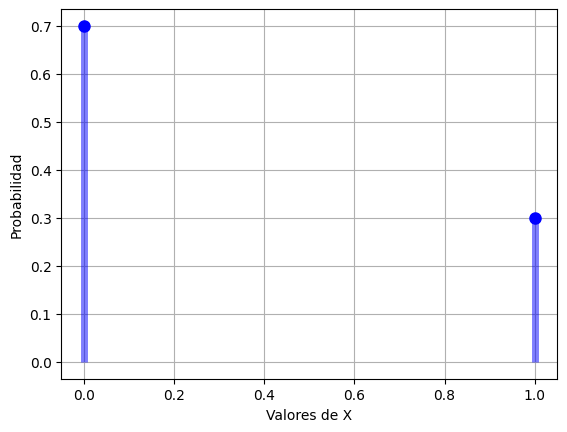

In [11]:
# Grafico: PMF
x = [0, 1]
y = X.pmf(x)
plt.plot(x, y, 'bo', ms=8, label='PMF')
plt.vlines(x, 0, y, colors='b', lw=5, alpha=0.5)
plt.xlabel('Valores de X')
plt.ylabel('Probabilidad')
plt.grid()

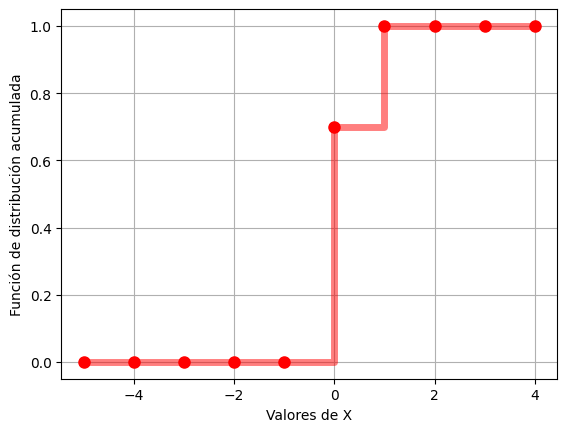

In [12]:
# Grafico: CDF
x = range(-5, 5)
y = X.cdf(x)
plt.plot(x, y, 'ro', ms=8, label='CDF')
plt.step(x, y, where="post", lw=5, alpha=0.5, color='r')
plt.xlabel('Valores de X')
plt.ylabel('Función de distribución acumulada')
plt.grid()

#### 1.2.2. Distribución Binomial

**Qué modela:**
El número total de éxitos en $n$ experimentos independientes de Bernoulli.

**Ejemplo:**
Tirar una moneda $n$ veces y contar cuántas veces sale cara.

**Parámetros:**

- $n$: número de ensayos
- $\theta$: probabilidad de éxito en cada ensayo

Se denota como:

$$
X \sim \text{Binomial}(n, \theta)
$$

La pmf de una distribución binomial es:

$$
p(a) = \left(\begin{array}{c}n \\ a \end{array}\right) \theta^a (1 - \theta)^{n-a}
$$

Si hacemos $n=1$, $\text{Binomial}(1, \theta) = \text{Bernoulli}(\theta)$.

In [13]:
# Variable aleatoria binomial
theta = 0.3
X = stats.binom(n=10, p=theta)

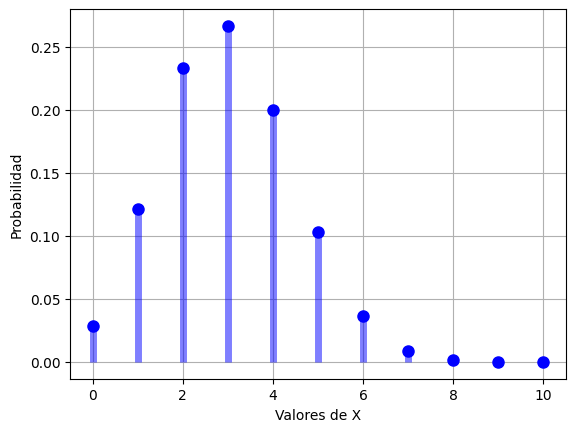

In [14]:
# Grafico: PMF
x = range(0, 11)
y = X.pmf(x)
plt.plot(x, y, 'bo', ms=8, label='PMF')
plt.vlines(x, 0, y, colors='b', lw=5, alpha=0.5)
plt.xlabel('Valores de X')
plt.ylabel('Probabilidad')
plt.grid()

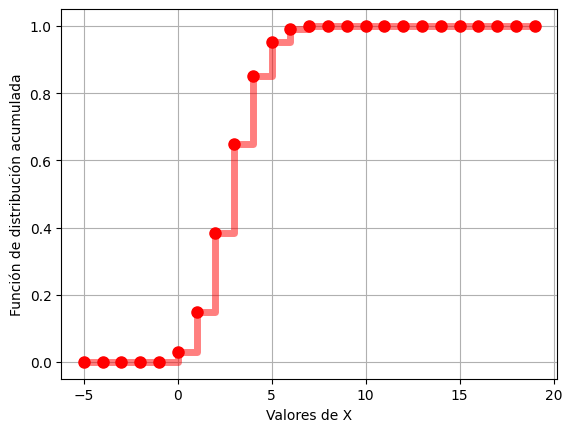

In [15]:
# Grafico: CDF
x = range(-5, 20)
y = X.cdf(x)
plt.plot(x, y, 'ro', ms=8, label='CDF')
plt.step(x, y, where="post", lw=5, alpha=0.5, color='r')
plt.xlabel('Valores de X')
plt.ylabel('Función de distribución acumulada')
plt.grid()

#### 1.2.3 Distribución Geométrica

**Qué modela:**
El número de ensayos hasta obtener el primer éxito (incluyendo ese éxito).

**Ejemplo:**
Tirar una moneda hasta que salga cara por primera vez.
Si sale cara en el tercer intento, $X=3$.

**Parámetros:**
$\theta$: probabilidad de éxito en cada intento.

Se denota como:

$$
X \sim \text{Geometric}(\theta)
$$

La VA $X$ sigue una distribución geométrica con parámetro $\theta$ si,

- $X$ toma los valores $1, 2, 3, \dots$
- Su pmf está dada por $p(a) = \theta (1 - \theta)^{a - 1}$.

La denotamos como $Geom(\theta)$.

In [16]:
# Variables aleatorias Geométricas
theta1 = 0.3
theta2 = 0.7
X1 = stats.geom(p=theta1)
X2 = stats.geom(p=theta2)

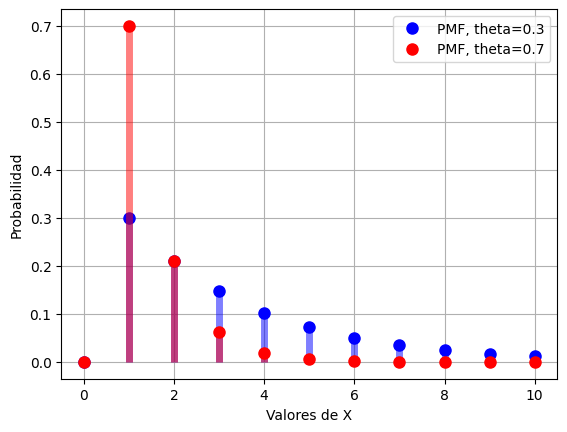

In [17]:
# Grafico: PMF
x = range(0, 11)
y1 = X1.pmf(x)
y2 = X2.pmf(x)
plt.plot(x, y1, 'bo', ms=8, label='PMF, theta=0.3')
plt.vlines(x, 0, y1, colors='b', lw=5, alpha=0.5)

plt.plot(x, y2, 'ro', ms=8, label='PMF, theta=0.7')
plt.vlines(x, 0, y2, colors='r', lw=5, alpha=0.5)

plt.xlabel('Valores de X')
plt.ylabel('Probabilidad')
plt.grid()
plt.legend()

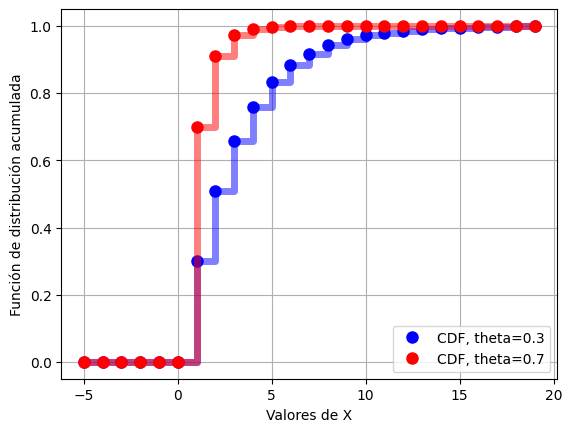

In [18]:
# Grafico: CDF
x = range(-5, 20)
y1 = X1.cdf(x)
y2 = X2.cdf(x)
plt.plot(x, y1, 'bo', ms=8, label='CDF, theta=0.3')
plt.step(x, y1, where="post", lw=5, alpha=0.5, color='b')

plt.plot(x, y2, 'ro', ms=8, label='CDF, theta=0.7')
plt.step(x, y2, where="post", lw=5, alpha=0.5, color='r')

plt.xlabel('Valores de X')
plt.ylabel('Función de distribución acumulada')

plt.legend()
plt.grid()

### 1.3. Valor esperado y varianza (discretas)

#### 1.3.1. Esperanza

Antes de definirla formalmente, es importante notar que el valor esperado no solo se aplica a la variable aleatoria en sí, sino también a **cualquier función de la variable**. Es decir, podemos calcular el valor esperado de $f(X)$, donde $(f)$ es una función que transforma los valores de la variable aleatoria.

Esto permite, por ejemplo, obtener cantidades como:

- la varianza: $\mathbb{E}[X^2]$
- la utilidad esperada: $\mathbb{E}[\log X]$
- el valor esperado de pérdidas u otras métricas de interés

Este enfoque más general se expresa como:

$$
\mathbb{E}[f(X)] = \sum_x p(x) \cdot f(x)
$$

Y si tomamos $f(x) = x$, recuperamos la forma más común del valor esperado:

$$
\mathbb{E}[X] = \sum_x p(x) \cdot x
$$

#### 1.3.2. Varianza

El valor esperado es una _medida de tendencia central_, en el sentido de que nos da un valor promedio, o “centro de gravedad” probabilístico, hacia el cual tienden los datos al repetirse el experimento muchas veces.

Sin embargo, **no nos dice qué tan dispersos están los valores alrededor de ese promedio**. Para eso, necesitamos una medida de variabilidad: la **varianza**.

La varianza de una función $f(X)$, denotada como $\mathrm{var}_p[f]$, se define como:

$$
\mathrm{var}_p[f] = \mathbb{E}_p\left[(f(x) - \mathbb{E}_p[f])^2\right]
$$

Esta expresión se interpreta como el **promedio ponderado de los cuadrados de las desviaciones** entre los valores de $f(x)$ y su esperanza. En otras palabras: mide **cuánto varían los valores alrededor de su media**.

Una forma algebraicamente más sencilla y muy útil para calcular la varianza es:

$$
\mathrm{var}_p[f] = \mathbb{E}_p[f(x)^2] - \left(\mathbb{E}_p[f]\right)^2
$$

Esta fórmula permite calcular la varianza a partir de **dos esperanzas**:

- La esperanza del cuadrado de $f(x)$
- El cuadrado de la esperanza de $f(x)$

#### 1.3.3. Cálculo de esperanza y varianza de variable aleatoria Bernoulli

Sea $X$ una variable aleatoria que toma valores en el conjunto $\{0, 1\}$. Se denota como:

![Distribución Bernoulli](../images/bernulli-1.png)

- En **verde**, se resalta la probabilidad $P(X = 1) = \theta$.
- En **azul**, se muestra que $P(X = 0) = 1 - \theta$.

## Esperanza de una variable Bernoulli

La esperanza matemática o valor esperado de $X$ se define como:

![Esperanza de X](../images/bernulli-2.png)

- Los términos en **azul** y **verde** ayudan a identificar qué probabilidad corresponde a cada valor posible de $X$.
- El resultado final, $\mathbb{E}[X] = \theta$, está **enmarcado en morado** para destacarlo.

##### A) Esperanza de $X^2$

Dado que los únicos valores posibles de $X$ son 0 y 1, se cumple que $X^2 = X$. Por lo tanto:

![Esperanza de X al cuadrado](../images/bernulli-3.png)

- Esta igualdad se debe a que $0^2 = 0$ y $1^2 = 1$, así que no hay cambio al elevar al cuadrado.


##### B) Varianza de una variable Bernoulli

La varianza se calcula con la fórmula:

![Varianza de X](../images/bernulli-4.png)

- Se utiliza el resultado anterior $\mathbb{E}[X] = \theta$.
- El desarrollo muestra cómo se simplifica la fórmula hasta obtener $\theta(1 - \theta)$, que aparece resaltado al final.


##### Ejemplo numérico

**Ejemplo 1.** Suponemos que tenemos un dado justo con cinco 3's y un 6. ¿Cuál esperaría que fuera el promedio de 6000 tiros?

In [37]:
x_vals = [3, 6]
probs = [5/6, 1/6]

# X1 (crear la variable aleatoria discreta)
X1 = stats.rv_discrete(name='X', values=(x_vals, probs))

# Calcular la esperanza (valor esperado)
E = X1.expect()
E

np.float64(3.5)

In [39]:
X1.rvs(size=100)

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 6, 6, 3,
       3, 3, 6, 3, 3, 3, 3, 3, 3, 6, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       6, 3, 3, 6, 3, 3, 3, 3, 3, 6, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 6, 3,
       3, 3, 6, 3, 3, 6, 3, 3, 3, 3, 3, 3, 3, 6, 3, 3, 3, 3, 3, 3, 3, 3,
       6, 3, 3, 3, 3, 3, 3, 3, 6, 3, 3, 3])

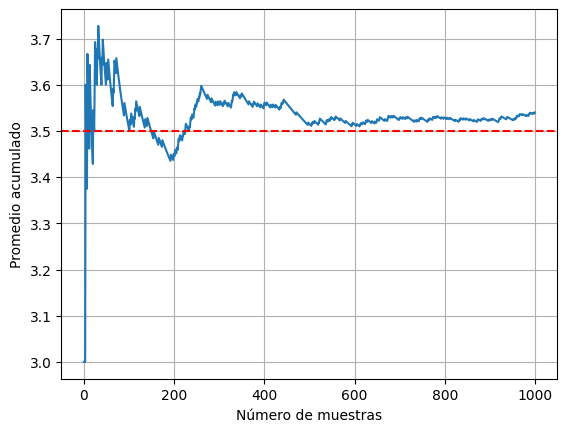

In [25]:
# Muestreamos la variable aleatoria
samples = X1.rvs(size=1000)

# Obtenemos el promedio a medida que vamos obteniendo más muestras
cummulative_average = np.cumsum(samples) / np.arange(1, 1001)

# Graficamos
plt.plot(cummulative_average, label='Promedio acumulado')
plt.axhline(y=E, color='r', linestyle='--', label='Valor esperado teórico')
plt.xlabel('Número de muestras')
plt.ylabel('Promedio acumulado')
plt.grid()

In [30]:
# Varianza X1
X1.var()

np.float64(1.25)

**Ejemplo 2.** Se tiran dos dados de seis caras. Si ganas $1000 si la suma es 2, y pierdes $100 de otro modo, ¿Cuánto esperas ganar en promedio por tiro?

In [28]:
# X2

X2 = stats.rv_discrete(name='X', values=((1000, -100), (1/36, 35/36)))

# Valor esperado teórico
E = X2.expect()
E

np.float64(-69.44444444444444)

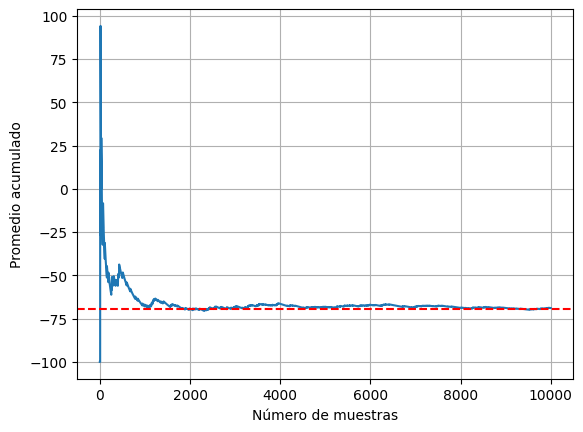

In [29]:
# Muestreamos la variable aleatoria
samples = X2.rvs(size=10000)

# Obtenemos el promedio a medida que vamos obteniendo más muestras
cummulative_average = np.cumsum(samples) / np.arange(1, 10001)

# Graficamos
plt.plot(cummulative_average, label='Promedio acumulado')
plt.axhline(y=E, color='r', linestyle='--', label='Valor esperado teórico')
plt.xlabel('Número de muestras')
plt.ylabel('Promedio acumulado')
plt.grid()

In [31]:
# Varianza X2
X2.var()

np.float64(32677.46913580247)

Si queremos una medida que nos de un sentido de dispersión en las "mismas unidades" de la variable aleatoria, podemos acudir a la desviación estándar, que se define como:

$$
\text{std}_p[f] = \sqrt{\text{var}_p[f]}
$$

In [32]:
print(X1.std())
print(X2.std())

1.118033988749895
180.76910448359936


```{admonition} Actividad de integración
:class: tip

Genera una función que nos permita calcular la esperanza y la varianza de una variable aleatoria discreta, dada su PMF. Utiliza esta función para calcular la esperanza y varianza de las siguientes distribuciones:

- Distribución Bernoulli con $\theta = 0.3$.
- Distribución Binomial con $n = 10$ y $\theta = 0.3
- Distribución Geométrica con $\theta = 0.3$.
```

In [ ]:
# Generemos una función que nos permita calcular la esperanza de una variable aleatoria discreta
# ¿cómo incorporamos la pmf?

def esperanza_varianza(soporte, pmf_func):
    """
    Calcula esperanza y varianza a partir de la definición.
    
    soporte: lista de valores posibles de X
    pmf_func: función que recibe x y devuelve P(X=x)
    """
    
    # Esperanza E[X]
    E_X = sum(x * pmf_func(x) for x in soporte)
    
    # Esperanza de X^2
    E_X2 = sum((x**2) * pmf_func(x) for x in soporte)
    
    # Varianza Var(X)
    Var_X = E_X2 - E_X**2
    
    return E_X, Var_X

In [42]:
# Bernoulli

theta = 0.3
soporte = [0, 1]
pmf_bernoulli = lambda x: theta if x == 1 else (1 - theta)

E, Var = esperanza_varianza(soporte, pmf_bernoulli)
print("Bernoulli → Esperanza:", E, "Varianza:", Var)

Bernoulli → Esperanza: 0.3 Varianza: 0.21


In [43]:
# Binomial

import math

n = 10
theta = 0.3
soporte = range(n + 1)

def pmf_binomial(k):
    return math.comb(n, k) * (theta ** k) * ((1 - theta) ** (n - k))

E, Var = esperanza_varianza(soporte, pmf_binomial)
print("Binomial → Esperanza:", E, "Varianza:", Var)

Binomial → Esperanza: 2.9999999999999987 Varianza: 2.1000000000000014


In [44]:
# Geométrica

theta = 0.3
K = 100  # truncamos la suma
soporte = range(1, K + 1)

pmf_geometrica = lambda k: ((1 - theta) ** (k - 1)) * theta

E, Var = esperanza_varianza(soporte, pmf_geometrica)
print("Geométrica (aprox) → Esperanza:", E, "Varianza:", Var)

Geométrica (aprox) → Esperanza: 3.333333333333299 Varianza: 7.77777777777454


##### 💡 Pregunta: en lo anterior, _¿estamos usando datos para generar el cálculo?_